In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
logs=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/3_logs.csv')

In [3]:
user_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/3_user_data.csv')

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [4]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [6]:
df=user_data.merge(logs, on='client')

In [7]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [8]:
df_logs_1

NameError: name 'df_logs_1' is not defined

In [9]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. 

In [10]:
logs_l=logs.query('success == True' ) \
    .groupby('client', as_index=False) \
    .agg({'success' : 'count'}) \
    .sort_values(['success'], ascending=False)  

In [11]:
#12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719

In [12]:
logs_l.head(10)

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


С какой платформы осуществляется наибольшее количество успешных операций?

In [13]:
logs.query('success == True' ) \
    .groupby('platform', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values(['success'], ascending=False) 

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?

In [14]:
df_logs_1=df.merge(user_data, on='premium', how='inner')
#Примерджили таблицу user_data по колонке premium взяв значения с помощью inner join

In [15]:
df_logs_1

,client_x,premium,age_x,success,platform,time,client_y,age_y
0,46346,False,58,True,phone,1585452839,46346,58
1,46346,False,58,True,phone,1585452839,4391,55
2,46346,False,58,True,phone,1585452839,27372,64
3,46346,False,58,True,phone,1585452839,11989,44
4,46346,False,58,True,phone,1585452839,60664,49
...,...,...,...,...,...,...,...,...
7862927,61221,True,64,True,phone,1585440218,52373,36
7862928,61221,True,64,True,phone,1585440218,13688,66
7862929,61221,True,64,True,phone,1585440218,40643,22
7862930,61221,True,64,True,phone,1585440218,53774,50


In [16]:
df_logs_1.query('premium == True' ) \
         .groupby('platform', as_index=False) \
         .agg({'premium': 'count'}) \
         .sort_values(['premium'], ascending=False) 

,platform,premium
1,phone,99876
0,computer,60900
2,tablet,9744


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге

In [17]:
primes=df.query('premium == True')
prime2=df.query('premium == False')

In [18]:
prime2

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3433,27470,False,40,False,computer,1585443046
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3437,29863,False,46,True,tablet,1585443437


In [19]:
primes

,client,premium,age,success,platform,time
23,74867,True,27,False,computer,1585452086
24,49379,True,25,False,computer,1585433626
25,88203,True,35,True,phone,1585450059
30,32603,True,20,True,computer,1585473383
52,53182,True,24,True,phone,1585406474
...,...,...,...,...,...,...
3413,52373,True,36,True,phone,1585405142
3415,13688,True,66,True,computer,1585453923
3419,40643,True,22,True,phone,1585413473
3432,53774,True,50,True,phone,1585422804


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


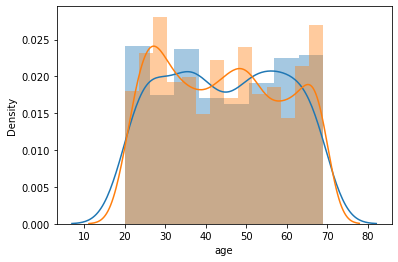

In [20]:
sns.distplot(primes.age)
sns.distplot(prime2.age)

In [21]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


Постройте график распределения числа успешных операций: 

x – число успешных операций

In [22]:
df_2=df.query('success == True')\
        .groupby('client', as_index=False)\
        .agg({'success' : 'sum'})

In [23]:
df_2


,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2099,99908,1
2100,99926,1
2101,99927,1
2102,99931,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


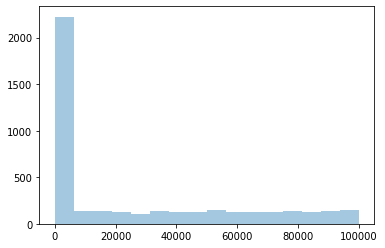

In [24]:
sns.distplot(df_2, kde=False)